In [1]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
from pytorch_grad_cam import GradCAM
from torchvision.datasets import ImageFolder
from torchvision import transforms

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models

In [2]:
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
sam.to(device="cuda")

predictor = SamPredictor(sam)

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

# Crear los Datasets
train_dataset = ImageFolder(root="Final_dataset_small4", transform=transform)
#validation_dataset = ImageFolder(root="Final_dataset_small/Validation", transform=transform)

# Crear los DataLoader
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
#validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=1, shuffle=True)

In [4]:
class Localizer(nn.Module):
    def __init__(self):
        super(Localizer, self).__init__()
        self.resnet = models.resnet50()
        for param in self.resnet.parameters():
            param.requires_grad = False
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2 * 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.resnet(x)
        #x = (x + 1) / 2  # scale the output from [-1,1] to [0,1]
        x = x * 224  # scale the output from [0,1] to [0,224]
        x = x.view(-1, 2, 2)
        return x

class Classifier(nn.Module):
    def __init__(self, num_classes = 10):
        super(Classifier, self).__init__()
        self.model = models.mobilenet_v2(pretrained=True)
        self.model.classifier[1] = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x

In [5]:
cuda = torch.device('cuda') 

localizer = Localizer()
localizer.to(device=cuda)


optimizer_loc = optim.Adam(localizer.parameters())
#optimizer_class = optim.Adam(classifier.parameters())

criterion = nn.CrossEntropyLoss()

p_labels = torch.tensor([ [1, 1] ]).to(device=cuda)

resize1 = transforms.Resize((1024, 1024))
resize2 = transforms.Resize((224, 224))

In [6]:
cuda = torch.device('cuda') 
# Load the model
# Load classifier model from classifier.pth
classifier = Classifier()
classifier.to(device=cuda)
classifier.load_state_dict(torch.load('classifier.pth'))
classifier.eval()
print('None')

c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


None


6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148376465
6.4874091148

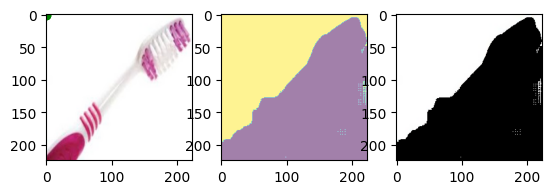

4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.203189849853516
4.20318984

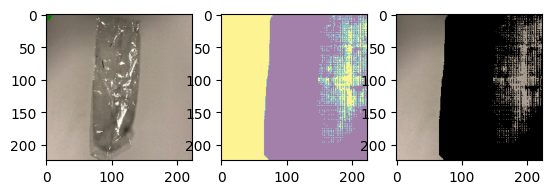

15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738952637
15.559252738

KeyboardInterrupt: 

In [8]:
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

#cam = GradCAM(model=classifier, target_layers=classifier.model.features[-1], use_cuda=True)

for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device=cuda), labels.to(device=cuda)
        inputs = resize1(inputs)
        predictor.set_torch_image(inputs * 255, (224, 224))

        with torch.set_grad_enabled(True):
            # get the points
            for _ in range(100):
                points = localizer(inputs)
                points2 = points.clone()
                points2 = predictor.transform.apply_coords_torch(points2.detach(), (224, 224))
                masks, iou_predictions, low_res_masks = predictor.predict_torch(point_coords=points2[0:1, 0:1, :], point_labels=p_labels[0:1, 0:1], multimask_output=False)
                masks, iou_predictions, low_res_masks = predictor.predict_torch(point_coords=points2[0:1, 0:2, :], point_labels=p_labels[0:1, 0:2], multimask_output=False, mask_input = low_res_masks)
                #masks, iou_predictions, low_res_masks = predictor.predict_torch(point_coords=points2[0:1, 0:3, :], point_labels=p_labels[0:1, 0:3], multimask_output=False, mask_input = low_res_masks)
                #masks, iou_predictions, low_res_masks = predictor.predict_torch(point_coords=points2[0:1, 0:4, :], point_labels=p_labels[0:1, 0:4], multimask_output=False, mask_input = low_res_masks)
                
                inputs = resize2(inputs)

                
                output = classifier(inputs * masks)
                loss = criterion(output, labels)

                reward = 1. / (loss + 1e-8)
                loss.backward(retain_graph=True)
                reward_expanded = reward.expand_as(points)
                points.backward(gradient=reward_expanded)
                print(loss.item())
                # Move the points depending on the loss
                optimizer_loc.step()
                optimizer_loc.zero_grad()

            # get the predictions

        # Print loss every 10 iterations
        if i % 1 == 0:
            print(points[0].detach().cpu().numpy())
            print(loss.item())
            # Show the image and the masks
            plt.subplot(1, 3, 1)
            plt.imshow(inputs[0].cpu().numpy().transpose(1, 2, 0))
            plt.scatter(points[0, 0:2, 0].detach().cpu().numpy() / 1, points[0, 0:2, 1].detach().cpu().numpy() / 1, c="g")
            #plt.scatter(points[0, 2:4, 0].detach().cpu().numpy() / 1, points[0, 2:4, 1].detach().cpu().numpy() / 1, c="r")
            plt.subplot(1, 3, 2)
            plt.imshow(masks[0, 0].cpu().numpy(), alpha=0.5)
            plt.subplot(1, 3, 3)
            plt.imshow((inputs * masks)[0].detach().cpu().numpy().transpose(1, 2, 0))
            plt.show()

            # Save the model
            torch.save(localizer.state_dict(), "localizer.pth")
            torch.save(classifier.state_dict(), "classifier2.pth")